## Migration Trends Analysis

In [21]:
#!pip install statsmodels --upgrade
#!pip install scipy --upgrade


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Load and Examine Data

In [13]:
# Load the specific sheet directly into a DataFrame
sheet_1_0_data = pd.read_excel("migration_trends_statistical_package_2021_22.xlsx", sheet_name="1.0")

### Data Cleaning

In [14]:
# Then proceed with the code you provided
filtered_data = sheet_1_0_data[sheet_1_0_data['Unnamed: 1'].notna() & sheet_1_0_data['Unnamed: 6'].notna()]
filtered_data.columns = ['Drop', 'Year', 'Skill Stream', 'Family Stream', 'Child Stream', 'Special Eligibility', 'Total']
filtered_data = filtered_data.drop(columns=['Drop']).reset_index(drop=True).drop([0, 1])
filtered_data['Year'] = filtered_data['Year'].astype(str)

# Convert 'Total' column to string, replace commas, then convert to integer
filtered_data['Total'] = filtered_data['Total'].astype(str).str.replace(',', '').astype(int)
filtered_data

,Year,Skill Stream,Family Stream,Child Stream,Special Eligibility,Total
2,1985–86,16200,62100,1300,400,80000
3,1986–87,28500,70700,1900,600,101700
4,1987–88,42000,77500,2000,600,122100
5,1988–89,51200,70400,2300,800,124700
6,1989–90,52700,64500,2100,900,120200
7,1990–91,49800,59300,2000,1200,112200
8,1991–92,41400,53700,2200,1700,98900
9,1992–93,21300,42600,2700,1400,67900
10,1993–94,18300,40700,2500,1300,62800
11,1994–95,30400,42000,2500,1600,76500


### Visualization of Migration Trends

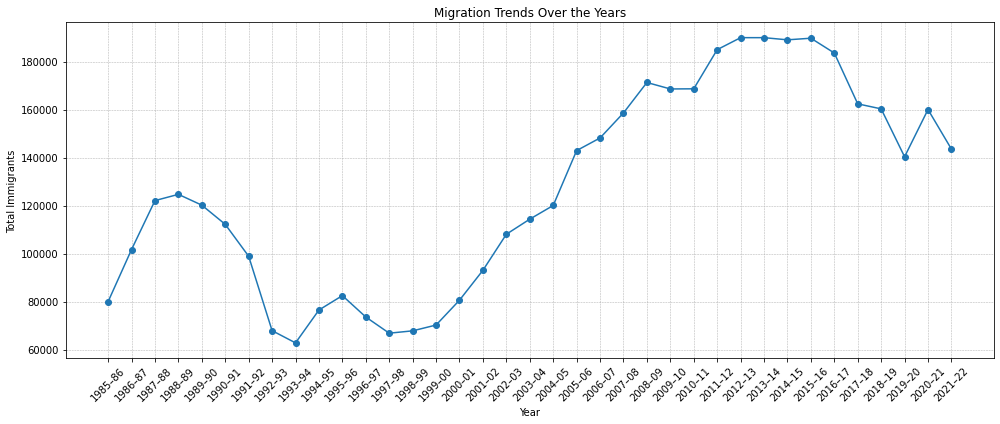

In [15]:
plt.figure(figsize=(14, 6))
plt.plot(filtered_data["Year"], filtered_data["Total"], marker='o', linestyle='-')
plt.title("Migration Trends Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Immigrants")
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

### Time Series Decomposition

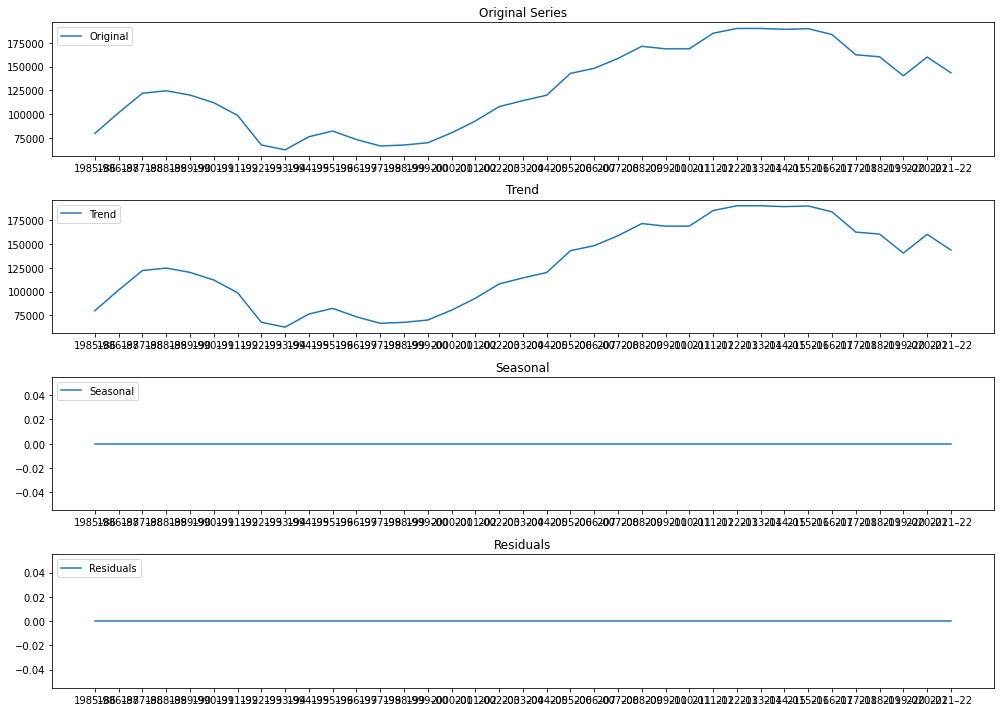

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
filtered_data.set_index('Year', inplace=True)

result = seasonal_decompose(filtered_data['Total'], model='additive', period=1)

plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(filtered_data['Total'], label='Original')
plt.legend(loc='upper left')
plt.title('Original Series')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='upper left')
plt.title('Residuals')

plt.tight_layout()
plt.show()

In [24]:
filtered_data_reset = filtered_data.reset_index()


### Stationarity Check and Model Fitting

In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarimax_model = SARIMAX(filtered_data_reset['Total'].tolist(), order=(1,1,1), seasonal_order=(0,0,0,0))
sarimax_result = sarimax_model.fit()
sarimax_result.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04626D+01    |proj g|=  7.20899D-02

At iterate    5    f=  1.04612D+01    |proj g|=  8.31582D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     10      1     0     0   6.666D-06   1.046D+01
  F =   10.461153470726291     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   37
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -387.063
Date:                Thu, 07 Sep 2023   AIC                            780.125
Time:                        21:24:28   BIC                            784.876
Sample:                             0   HQIC                           781.783
                                 - 37                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5593      0.342      1.638      0.101      -0.110       1.229
ma.L1         -0.3043      0.423     -0.719      0.472      -1.133       0.525
sigma2      1.385e+08   9.86e-10    1.4e+17      0.000    1.38e+08    1.38e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 0.10
Prob(Q):                              0.77   Prob(JB):                         0.95
Heteroskedasticity (H):               1.30   Skew:                            -0.13
Prob(H) (two-sided):                  0.65   Kurtosis:                         3.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.59e+34. Standard errors may be unstable.
"""

### Residual Diagnostics

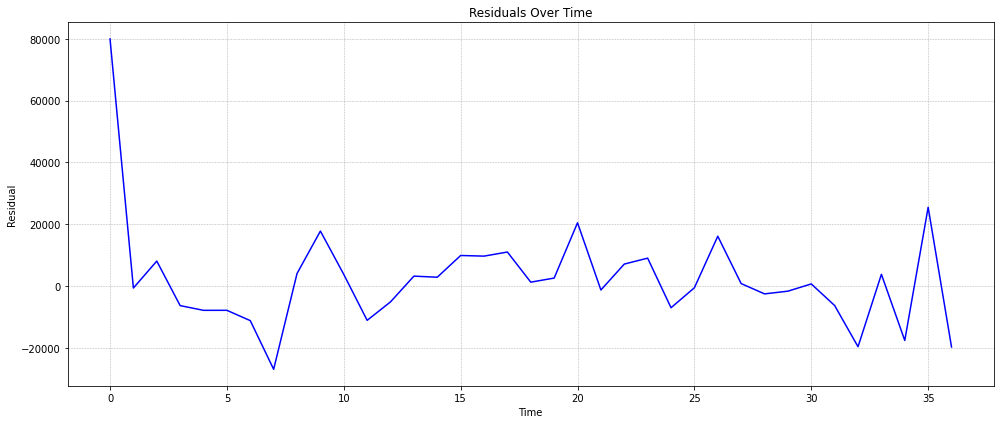

In [26]:
residuals = sarimax_result.resid

plt.figure(figsize=(14, 6))
plt.plot(residuals, color='blue')
plt.title('Residuals Over Time')
plt.xlabel('Time')
plt.ylabel('Residual')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [28]:
from statsmodels.graphics.tsaplots import plot_acf

<Figure size 1008x432 with 0 Axes>

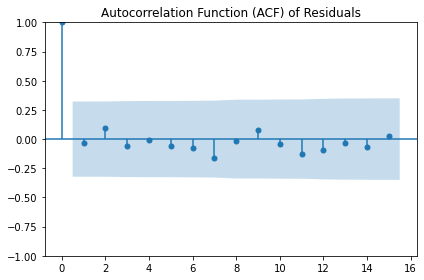

In [29]:
plt.figure(figsize=(14, 6))
plot_acf(residuals, lags=15)
plt.title('Autocorrelation Function (ACF) of Residuals')
plt.tight_layout()
plt.show()

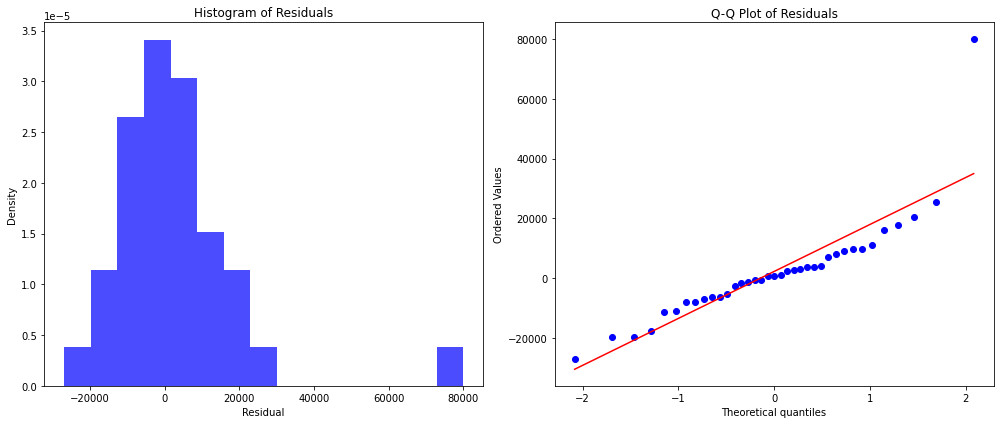

In [30]:
import scipy.stats as stats

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.hist(residuals, bins=15, density=True, color='blue', alpha=0.7)
ax1.set_title('Histogram of Residuals')
ax1.set_xlabel('Residual')
ax1.set_ylabel('Density')

stats.probplot(residuals, dist="norm", plot=ax2)
ax2.set_title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

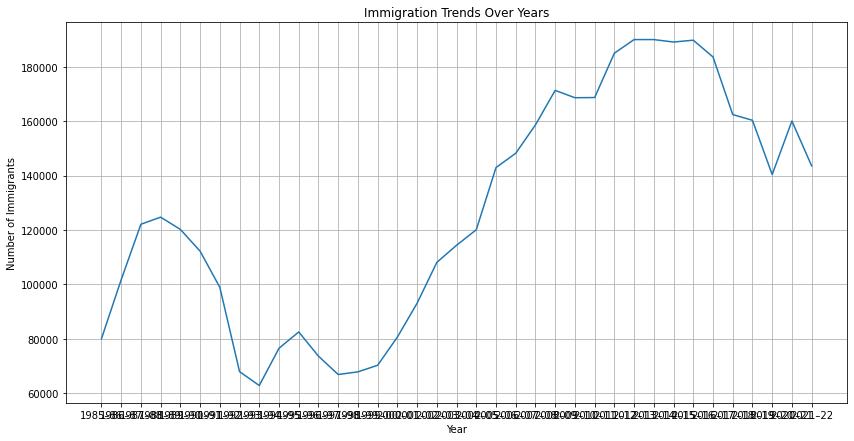

ADF Statistic: -2.8494324428504854
p-value: 0.051552241172413714
Critical Values: {'1%': -3.6790595944893187, '5%': -2.9678817237279103, '10%': -2.6231583472057074}
Data is not stationary, consider differencing


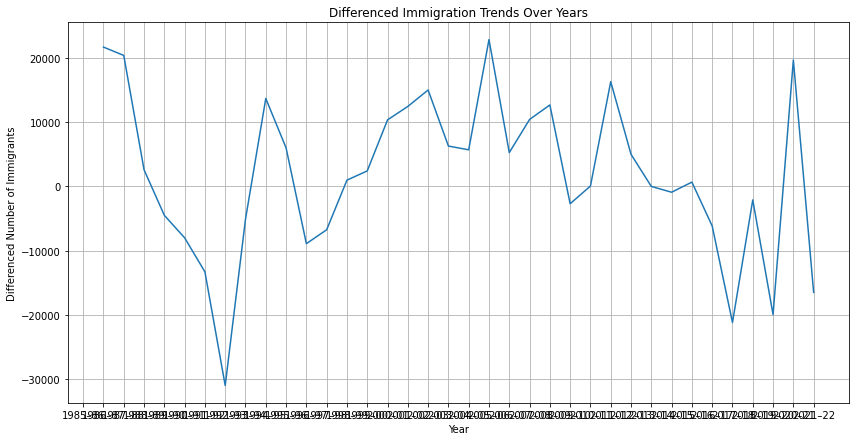

In [31]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# 1. Visualize the time series data
plt.figure(figsize=(14, 7))
plt.plot(filtered_data['Total'])
plt.title('Immigration Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.grid(True)
plt.show()

# 2. Check for stationarity using Augmented Dickey-Fuller test
result = adfuller(filtered_data['Total'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

if result[1] <= 0.05:
    print("Data is stationary")
else:
    print("Data is not stationary, consider differencing")

# 3. (If necessary) Differencing the data
filtered_data['Differenced_Total'] = filtered_data['Total'].diff().dropna()
plt.figure(figsize=(14, 7))
plt.plot(filtered_data['Differenced_Total'])
plt.title('Differenced Immigration Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Differenced Number of Immigrants')
plt.grid(True)
plt.show()


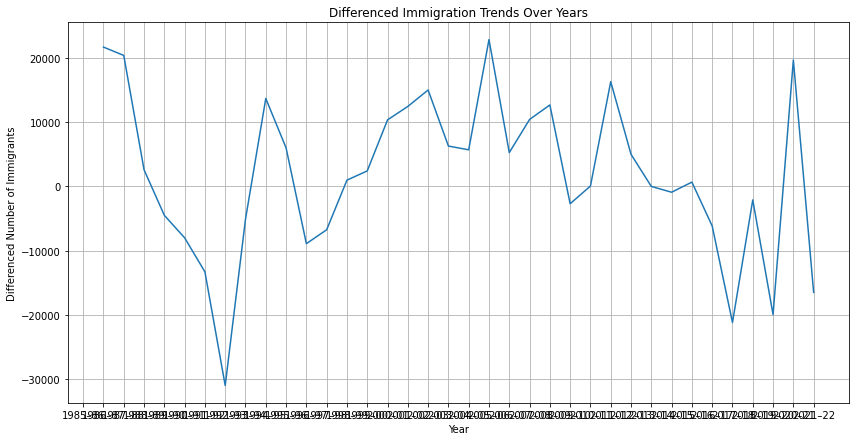

ADF Statistic for Differenced Data: -3.227093118540725
p-value for Differenced Data: 0.018469018591834366
Critical Values for Differenced Data: {'1%': -3.639224104416853, '5%': -2.9512301791166293, '10%': -2.614446989619377}
Differenced data is stationary


In [32]:
# 1. Differencing the data
filtered_data['Differenced_Total'] = filtered_data['Total'].diff().dropna()

# Visualize the differenced data
plt.figure(figsize=(14, 7))
plt.plot(filtered_data['Differenced_Total'])
plt.title('Differenced Immigration Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Differenced Number of Immigrants')
plt.grid(True)
plt.show()

# Check stationarity of the differenced data using ADF test
result_diff = adfuller(filtered_data['Differenced_Total'].dropna())
print('ADF Statistic for Differenced Data:', result_diff[0])
print('p-value for Differenced Data:', result_diff[1])
print('Critical Values for Differenced Data:', result_diff[4])

if result_diff[1] <= 0.05:
    print("Differenced data is stationary")
else:
    print("Differenced data is not stationary, consider further differencing or transformations")


<Figure size 1008x432 with 0 Axes>

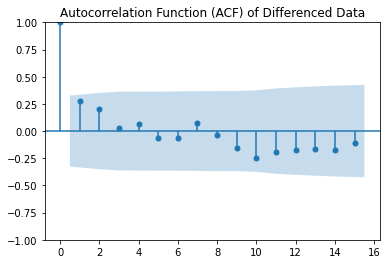

<Figure size 1008x432 with 0 Axes>

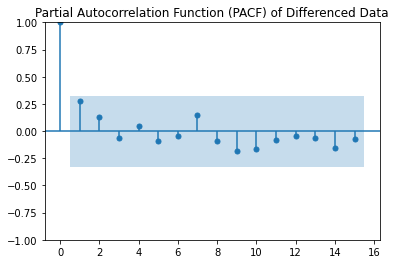

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF plot
plt.figure(figsize=(14, 6))
plot_acf(filtered_data['Differenced_Total'].dropna(), lags=15)
plt.title('Autocorrelation Function (ACF) of Differenced Data')
plt.show()

# PACF plot
plt.figure(figsize=(14, 6))
plot_pacf(filtered_data['Differenced_Total'].dropna(), lags=15)
plt.title('Partial Autocorrelation Function (PACF) of Differenced Data')
plt.show()


In [35]:
filtered_data_reset = filtered_data.reset_index(drop=True)


In [36]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA(1,1,1) model
model = ARIMA(filtered_data_reset['Total'], order=(1,1,1))
model_fit = model.fit()

# Print the summary of the ARIMA model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                   37
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -387.063
Date:                Fri, 08 Sep 2023   AIC                            780.125
Time:                        12:32:17   BIC                            784.876
Sample:                             0   HQIC                           781.783
                                 - 37                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5593      0.342      1.638      0.101      -0.110       1.229
ma.L1         -0.3043      0.423     -0.719      0.472      -1.133       0.525
sigma2      1.385e+08   9.86e-10    1.4e+17      0.0

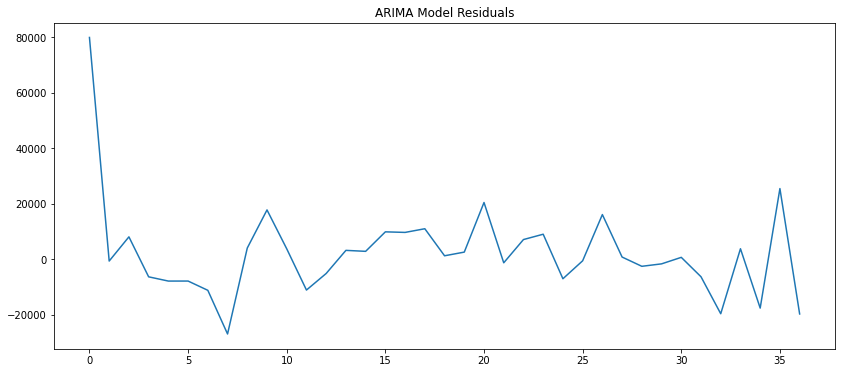

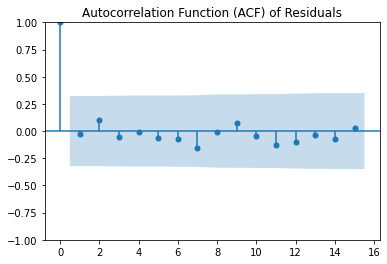

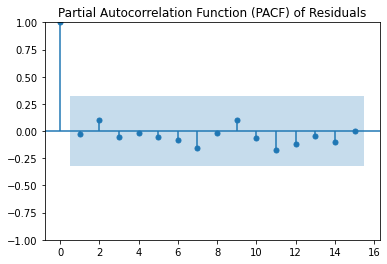

In [37]:
residuals = model_fit.resid

# Plot residuals
plt.figure(figsize=(14,6))
plt.plot(residuals)
plt.title('ARIMA Model Residuals')
plt.show()

# Plot ACF and PACF of residuals
plot_acf(residuals, lags=15)
plt.title('Autocorrelation Function (ACF) of Residuals')
plt.show()

plot_pacf(residuals, lags=15)
plt.title('Partial Autocorrelation Function (PACF) of Residuals')
plt.show()


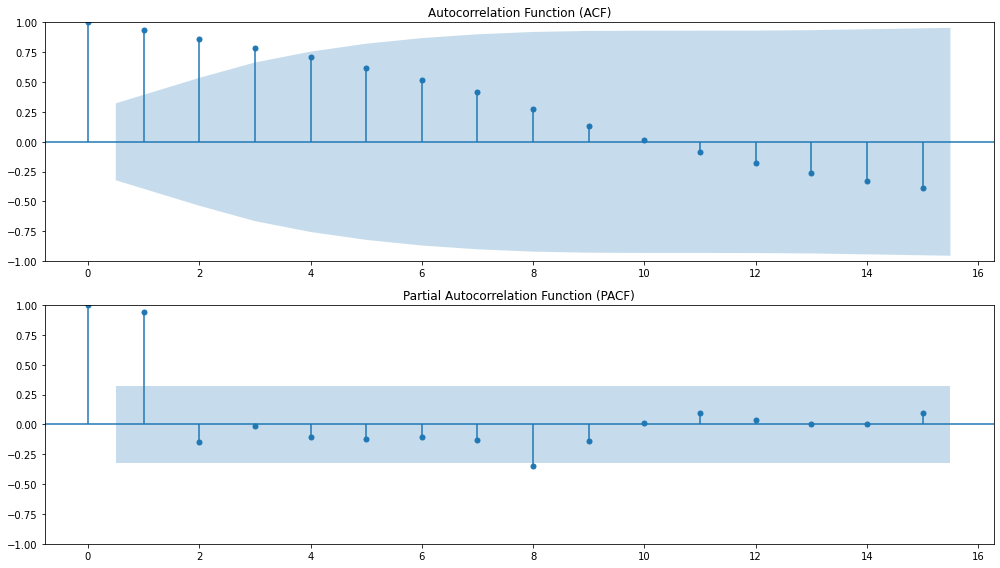

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8))

# Plot ACF
plot_acf(filtered_data['Total'], lags=15, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF)')

# Plot PACF
plot_pacf(filtered_data['Total'], lags=15, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


The ACF and PACF plots provide insights into the order of the ARIMA model:

ACF (Autocorrelation Function): The ACF plot shows a slow decay, suggesting a moving average (MA) component might be present.
PACF (Partial Autocorrelation Function): The PACF plot shows a significant spike at lag 1 and then tapers off, indicating a potential autoregressive (AR) component of order 1.


In [ ]:
Based on these plots:

The AR term (p) could be around 1, as suggested by the PACF.
The MA term (q) might also be considered, given the slow decay in the ACF.


- We haven't considered logarithmic transformations or explored the Holt-Winters method.
- We haven't investigated if there's a Pareto-like distribution in the data.

### In Summary:
Autocorrelation is like asking: "Given where the car was X minutes ago, can I predict where it is now?" The ACF plot visualizes how strong this relationship is over various time gaps (lags). If the car's motion has a certain rhythm or pattern, it will show up in the ACF as significant correlations at specific lags. If the car moves randomly, the ACF will quickly drop to near zero as lags increase.